In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# merge_table = pd.merge(info_pd, items_pd, on="customer_id", how="outer")
combine_df = df_ride.merge(df_city,  on ='city', how="left")

# Display the data table for preview
combine_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

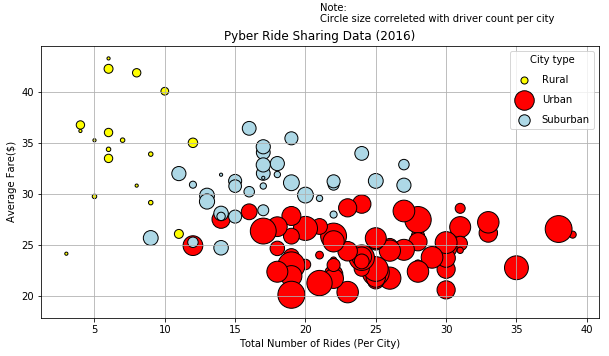

In [40]:
# Obtain the x and y coordinates for each of the three city types
groupby_city = combine_df.groupby("city")
fare_mean = round(groupby_city["fare"].mean(), 2)
rural_type = combine_df.loc[combine_df["type"] == "Rural", :]
total_in_rural = rural_type["city"].value_counts()
df_for_rural = pd.concat([total_in_rural, fare_mean,], axis=1, sort = False)
s_rural = rural_type["driver_count"]
df_for_rural = df_for_rural.dropna(how='any')
# city type urban 
urban_type = combine_df.loc[combine_df["type"] == "Urban", :]
total_in_urban = urban_type["city"].value_counts()
df_for_urban = pd.concat([total_in_urban, fare_mean,], axis=1, sort = False)
s_urban = urban_type["driver_count"]
df_for_urban = df_for_urban.dropna(how='any')
# city type Suburban
suburban_type = combine_df.loc[combine_df["type"] == "Suburban", :]
total_in_suburban = suburban_type["city"].value_counts()
df_for_suburban = pd.concat([total_in_suburban, fare_mean,], axis=1, sort = False)
s_suburban = suburban_type["driver_count"]
df_for_suburban = df_for_suburban.dropna(how='any')
# ploting
ax1 = df_for_rural.plot(kind="scatter", x="city", y="fare", s=s_rural*10, marker="o", color="yellow", edgecolors="black", label= "Rural", grid=True, figsize=(10,5), title="Pyber Ride Sharing Data (2016)")
ax2 = df_for_urban.plot(kind="scatter", x="city", y="fare", s=s_urban*10, marker="o", color="red", ax=ax1, edgecolors="black",label="Urban", grid=True, figsize=(10,5))
ax3 = df_for_suburban.plot(kind="scatter", x="city", y="fare", s=s_suburban*10, marker="o", color="lightblue", ax=ax1, edgecolors="black", label="Suburban", grid=True, figsize=(10,5))
ax1.set_xlabel("Total Number of Rides (Per City)")
ax1.set_ylabel("Average Fare($)")
ax1.legend(["Rural","Urban","Suburban"], title = "City type", labelspacing=1 )
ax1.annotate('Note:  \nCircle size correleted with driver count per city', xy=(0.5, 0.6), xycoords=('axes fraction', 'figure fraction'), xytext=(0, 120),textcoords='offset points', size=10)
plt.savefig("../Pyber/Pyber Ride Sharing Data.png")

## Total Fares by City Type

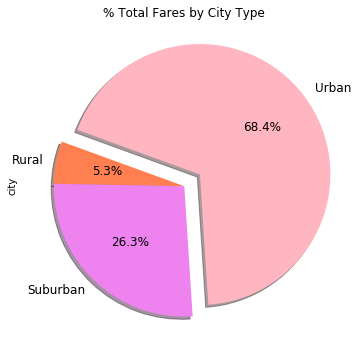

In [87]:
# Calculate Type Percents
groupby_type = combine_df.groupby("type")
total_by_type = groupby_type.count()
type_sum = total_by_type["city"].sum()
percents = round((total_by_type["city"]/type_sum)*100, 2)
df_per = percents.to_frame(name=None)
city_type = df_per.keys()
bike_pie = df_per.plot(kind="pie", y=city_type, shadow=True, autopct="%1.1f%%", fontsize=12, figsize=(6,6), colors=["coral", "violet", "lightpink"], startangle=160, explode=[0, 0, 0.15], title="% Total Fares by City Type", legend=False)


In [72]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


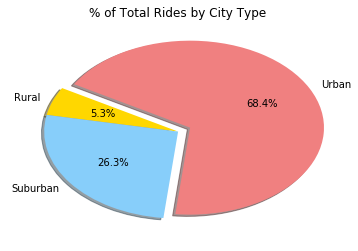

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


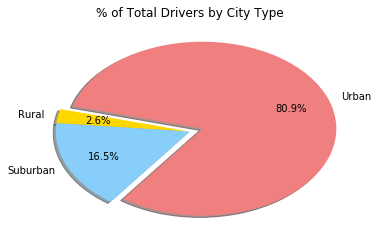

In [6]:
# Show Figure
plt.show()